# Students : Hazim Benslimane, Christopher Jabea, Dylan Rachwal, Alexandre Thouvenot 

## Project of Machine learning for classification on the 2 datasets Banknote Authentication and Chronic Kidney Disease

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA
from functions import *
from sklearn.utils import shuffle

mpl.style.use("ggplot")

Populating the interactive namespace from numpy and matplotlib


# Import Dataset Banknote

In [2]:
columns_name = ['variance', 'skewness','curtosis','entropy','class']
X_df,Y,class_labels = load_data("data_banknote_authentication.txt", False, columns_name)
X_df = min_max_normalization(X_df)

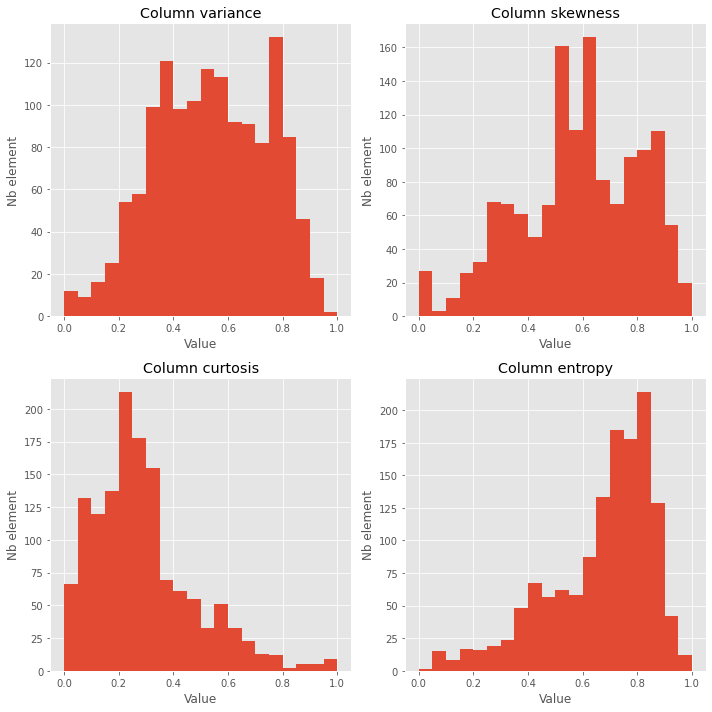

In [3]:
axs = display_data_histogram(X_df, 2, 2)
plt.show()

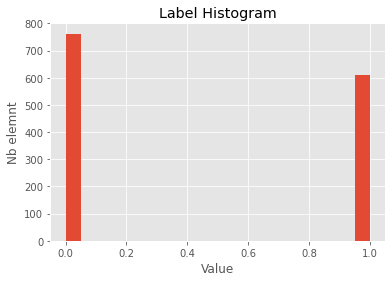

In [4]:
plt.hist(Y, bins=20)
plt.title('Label Histogram')
plt.xlabel('Value')
plt.ylabel('Nb elemnt')
plt.show()

In [5]:
X, Y = shuffle(X_df.values, Y)

In [6]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 200)

## PCA

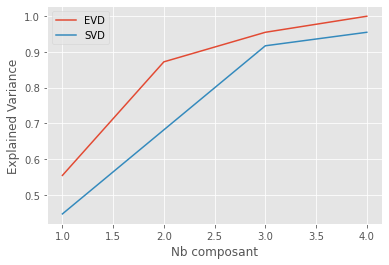

In [7]:
# PCA based on EVD decomposition
pca_evd = PCA_dec(X)

# PCA based on SVD decompostion 
pca_svd = PCA(n_components=4)
pca_svd.fit(X)

plt.plot(range(1,5), pca_evd.exp_variance(), label="EVD")
plt.plot(range(1,5), 1-pca_svd.explained_variance_ratio_, label="SVD")
plt.xlabel('Nb composant')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

In [8]:
X_pca_2 = pca_evd.PCA_decomposition(2)

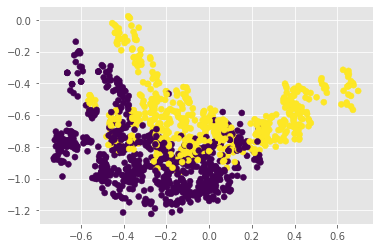

In [9]:
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y)
plt.show()

In [10]:
X_pca_3 = pca_evd.PCA_decomposition(3)

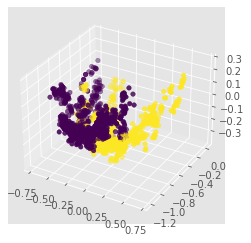

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=Y)
plt.show()

## KNN

In [12]:
K = 10
n_split = 5

accuracy, recall = train_knn_kfold(X,Y,n_split,K, class_labels)

print("Class 0 accuracy : ", accuracy[0,0])
print("Class 1 accuracy : ", accuracy[0,1])
print("Class 0 recall : ", recall[0,0])
print("Class 1 recall : ", recall[0,1])

Class 0 accuracy :  0.9974842767295599
Class 1 accuracy :  1.0
Class 0 recall :  1.0
Class 1 recall :  0.9965811965811966


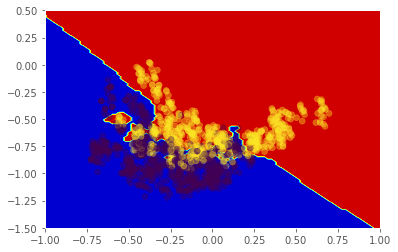

In [13]:
K = 10
X_pca_2 = pca_evd.PCA_decomposition(2)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1.5, 0.5, 100)

mesh_x, mesh_y = np.meshgrid(x, y)
u = np.dstack((mesh_x.reshape(-1), mesh_y.reshape(-1)))[0]
Y_pred = KNN(X_pca_2, Y, u, K)
plt.contourf(x,y,Y_pred.reshape(100,100), cmap='jet')
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y, alpha=0.4)
plt.show()

## SVM

In [14]:
model_svm, Y_pred_SVM = predict_SVC(X_train, X_test, Y_train)

In [15]:
scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
cv = 50

scores = multiple_prediction_scores(model_svm, X, Y, cv = cv,  scoring=scoring)

In [16]:
for key in enumerate (scores.keys()):
    print((f"For the metric {key[1]}, the mean is {round(scores[key[1]].mean(),3)} and the standard deviation is {round(scores[key[1]].std(),3)}.\n"))

For the metric fit_time, the mean is 0.011 and the standard deviation is 0.002.

For the metric score_time, the mean is 0.003 and the standard deviation is 0.004.

For the metric test_precision_macro, the mean is 0.98 and the standard deviation is 0.03.

For the metric test_recall_macro, the mean is 0.982 and the standard deviation is 0.03.

For the metric test_roc_auc, the mean is 1.0 and the standard deviation is 0.0.

For the metric test_f1, the mean is 0.979 and the standard deviation is 0.033.



SVCModel Train Score is :  0.9829351535836177
SVCModel Test Score is :  0.96


C:\Users\dylan\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


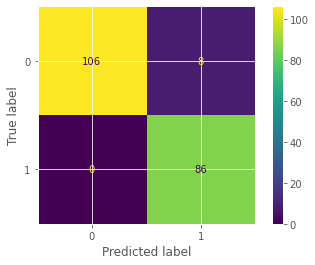

In [17]:
print('SVCModel Train Score is : ' , model_svm.score(X_train, Y_train))
print('SVCModel Test Score is : ' , model_svm.score(X_test, Y_test))
display_confusion_matrix(model_svm,X_test,Y_test, Y_pred_SVM);

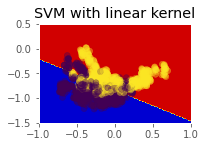

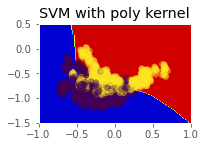

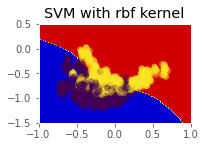

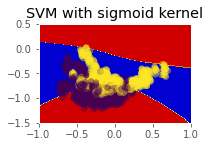

In [18]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = split_data(X_pca_2, Y, 200)
scores=[]
x = np.linspace(-1, 1, 100)
y = np.linspace(-1.5, 0.5, 100)
str = ['linear', 'poly', 'rbf', 'sigmoid']
mesh_x, mesh_y = np.meshgrid(x, y)
u = np.dstack((mesh_x.reshape(-1), mesh_y.reshape(-1)))[0]

for i, clf in enumerate(str):
    plt.subplot(2, 2, i + 1)
    model_svm, Y_pred = predict_SVC(X_train_pca, u, Y_train_pca, kernel = clf)
    plt.contourf(x,y,Y_pred.reshape(100,100), cmap='jet')
    plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y, alpha=0.4)
    plt.title('SVM with ' + clf + ' kernel')
    plt.show()
    scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
    cv = 50
    scores.append(multiple_prediction_scores(model_svm, X_pca_2, Y, cv = cv,  scoring=scoring))

In [19]:
for i, score in enumerate(scores):
    print('------------------------------\n')
    print('SVM with ' + str[i] + ' kernel')
    for key in enumerate (score.keys()):
        print((f"For the metric {key[1]}, the mean is {round(score[key[1]].mean(),3)} and the standard deviation is {round(score[key[1]].std(),3)}"))

------------------------------

SVM with linear kernel
For the metric fit_time, the mean is 0.027 and the standard deviation is 0.004
For the metric score_time, the mean is 0.004 and the standard deviation is 0.004
For the metric test_precision_macro, the mean is 0.785 and the standard deviation is 0.093
For the metric test_recall_macro, the mean is 0.773 and the standard deviation is 0.092
For the metric test_roc_auc, the mean is 0.887 and the standard deviation is 0.066
For the metric test_f1, the mean is 0.742 and the standard deviation is 0.102
------------------------------

SVM with poly kernel
For the metric fit_time, the mean is 0.029 and the standard deviation is 0.003
For the metric score_time, the mean is 0.003 and the standard deviation is 0.003
For the metric test_precision_macro, the mean is 0.825 and the standard deviation is 0.082
For the metric test_recall_macro, the mean is 0.82 and the standard deviation is 0.084
For the metric test_roc_auc, the mean is 0.928 and the

## Decision Tree and Forest

In [20]:
tab_log_tree = find_best_depths(X,Y,cv=True)

Text(0, 0.5, 'Negative Log Loss')

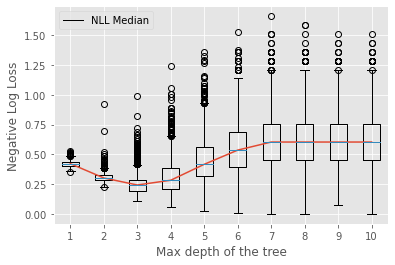

In [21]:
plt.boxplot(tab_log_tree)
plt.plot(linspace(1, 10, 10),[np.median(x) for x in tab_log_tree])
plt.legend(['NLL Median'])
xlabel('Max depth of the tree')
ylabel('Negative Log Loss')

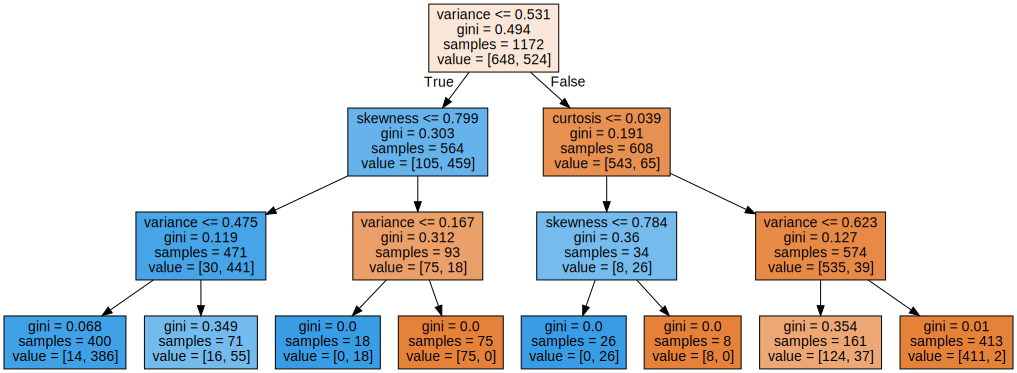

In [22]:
model, pred = predict_Random_Tree_Classification(X_train, X_test, Y_train, 3)
plot_decision_tree(model, columns_name[:-1])

# Import Dataset Kidney disease

In [23]:
X_df,Y,class_labels = load_data("kidney_disease.csv", True)
X = min_max_normalization(X_df)

In [24]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 200)

<Figure size 720x720 with 0 Axes>

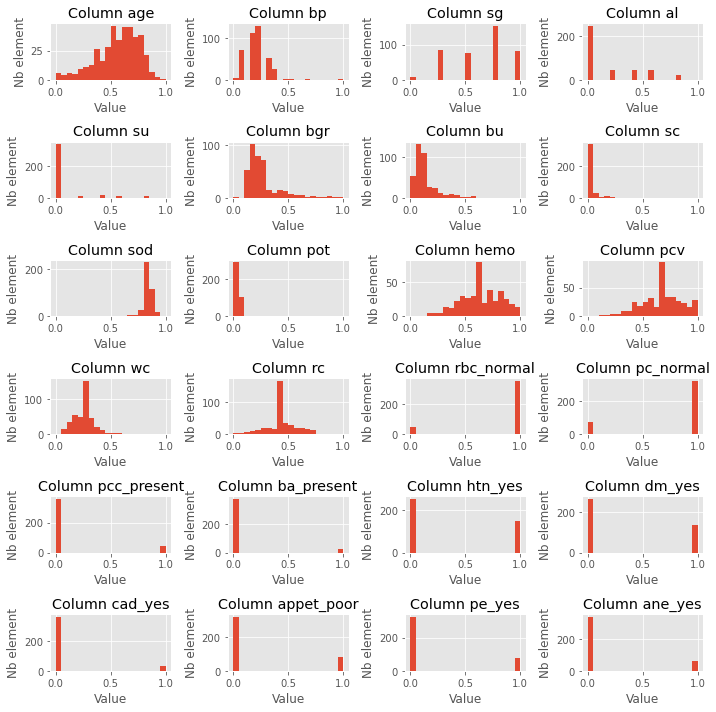

In [25]:
fig = plt.figure(figsize=(10,10))
axs = display_data_histogram(X, 6, 4)
plt.show()

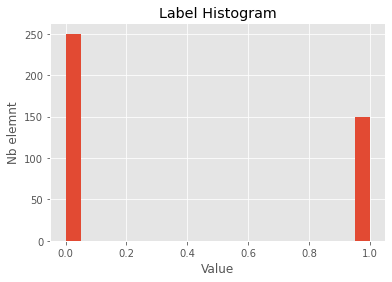

In [26]:
plt.hist(Y, bins=20)
plt.title('Label Histogram')
plt.xlabel('Value')
plt.ylabel('Nb elemnt')
plt.show()

## PCA 

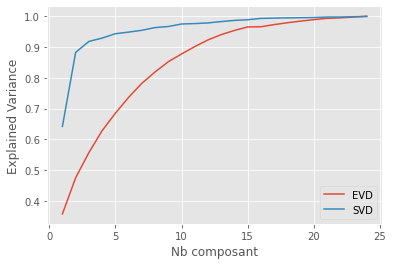

In [27]:
# PCA based on EVD decomposition
pca_evd = PCA_dec(X.values)

# PCA based on SVD decompostion 
pca_svd = PCA(n_components=24)
pca_svd.fit(X.values)

plt.plot(range(1,25), pca_evd.exp_variance(), label="EVD")
plt.plot(range(1,25), 1-pca_svd.explained_variance_ratio_, label="SVD")
plt.xlabel('Nb composant')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

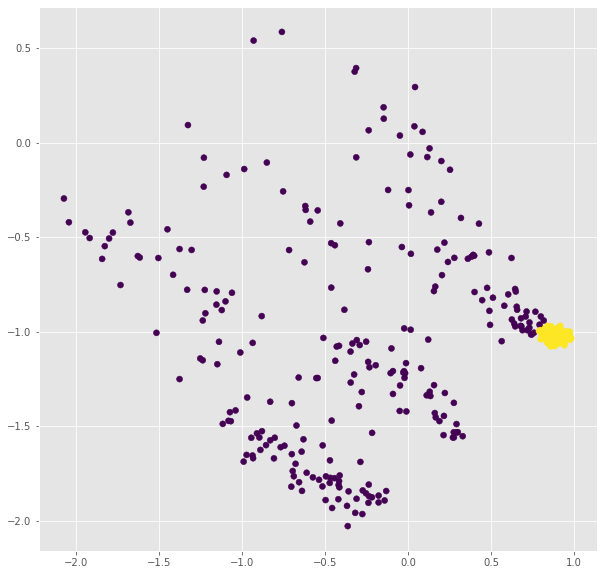

In [28]:
X_pca_2 = pca_evd.PCA_decomposition(2)
plt.figure(figsize=(10,10))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y)
plt.show()

## SVM

In [29]:
model_svm, Y_pred_SVM = predict_SVC(X_train, X_test, Y_train)

In [30]:
scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
cv = 5

scores = multiple_prediction_scores(model_svm, X, Y, cv = cv,  scoring=scoring)

In [31]:
for key in enumerate (scores.keys()):
    print((f"For the metric {key[1]}, the mean is {round(scores[key[1]].mean(),3)} and the standard deviation is {round(scores[key[1]].std(),3)}.\n"))

For the metric fit_time, the mean is 0.002 and the standard deviation is 0.002.

For the metric score_time, the mean is 0.004 and the standard deviation is 0.001.

For the metric test_precision_macro, the mean is 0.981 and the standard deviation is 0.015.

For the metric test_recall_macro, the mean is 0.988 and the standard deviation is 0.01.

For the metric test_roc_auc, the mean is 1.0 and the standard deviation is 0.0.

For the metric test_f1, the mean is 0.981 and the standard deviation is 0.015.



SVCModel Train Score is :  0.985
SVCModel Test Score is :  0.985


C:\Users\dylan\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


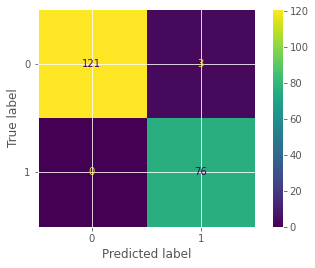

In [32]:
print('SVCModel Train Score is : ' , model_svm.score(X_train, Y_train))
print('SVCModel Test Score is : ' , model_svm.score(X_test, Y_test))
display_confusion_matrix(model_svm,X_test,Y_test, Y_pred_SVM);

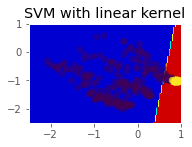

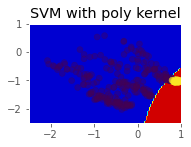

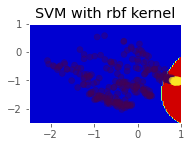

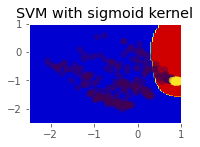

In [33]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = split_data(X_pca_2, Y, 200)
scores=[]
x = np.linspace(-2.5, 1, 100)
y = np.linspace(-2.5, 1, 100)
str = ['linear', 'poly', 'rbf', 'sigmoid']
mesh_x, mesh_y = np.meshgrid(x, y)
u = np.dstack((mesh_x.reshape(-1), mesh_y.reshape(-1)))[0]

for i, clf in enumerate(str):
    plt.subplot(2, 2, i + 1)
    model_svm, Y_pred = predict_SVC(X_train_pca, u, Y_train_pca, kernel = clf)
    plt.contourf(x,y,Y_pred.reshape(100,100), cmap='jet')
    plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y, alpha=0.4)
    plt.title('SVM with ' + clf + ' kernel')
    plt.show()
    scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
    cv = 50
    scores.append(multiple_prediction_scores(model_svm, X_pca_2, Y, cv = cv,  scoring=scoring))

## Decision Tree and Forest

In [34]:
tab_log_tree = find_best_depths(X,Y,cv=True)

Text(0, 0.5, 'Negative Log Loss')

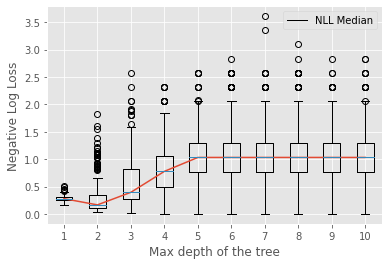

In [35]:
plt.boxplot(tab_log_tree)
plt.plot(linspace(1, 10, 10),[np.median(x) for x in tab_log_tree])
plt.legend(['NLL Median'])
xlabel('Max depth of the tree')
ylabel('Negative Log Loss')

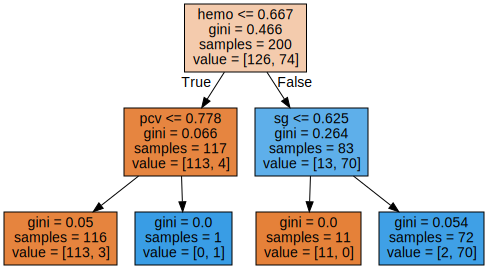

In [36]:
model, pred = predict_Random_Tree_Classification(X_train, X_test, Y_train, 2)
plot_decision_tree(model, X.columns)

In [37]:
model, pred = predict_Random_Forest_Classification(X_train, X_test, Y_train, 2, 1000)

In [38]:
scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'f1']
cv = 10

scores = multiple_prediction_scores(model, X, Y, cv = cv,  scoring=scoring)

In [39]:
for key in enumerate (scores.keys()):
    print((f"For the metric {key[1]}, the mean is {round(scores[key[1]].mean(),3)} and the standard deviation is {round(scores[key[1]].std(),3)}.\n"))

For the metric fit_time, the mean is 0.888 and the standard deviation is 0.012.

For the metric score_time, the mean is 0.153 and the standard deviation is 0.023.

For the metric test_precision_macro, the mean is 0.975 and the standard deviation is 0.024.

For the metric test_recall_macro, the mean is 0.973 and the standard deviation is 0.025.

For the metric test_roc_auc, the mean is 0.998 and the standard deviation is 0.002.

For the metric test_f1, the mean is 0.967 and the standard deviation is 0.03.



## KNN

In [40]:
K = 5
n_split = 5

accuracy, recall = train_knn_kfold(X.values,Y,n_split,K,class_labels)

print("Class 0 accuracy : ", accuracy[0,0])
print("Class 1 accuracy : ", accuracy[0,1])
print("Class 0 recall : ", recall[0,0])
print("Class 1 recall : ", recall[0,1])

Class 0 accuracy :  0.9591585081585082
Class 1 accuracy :  1.0
Class 0 recall :  1.0
Class 1 recall :  0.9389470611282256


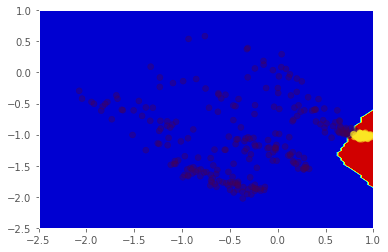

In [41]:
K = 10
X_pca_2 = pca_evd.PCA_decomposition(2)
x = np.linspace(-2.5, 1, 100)
y = np.linspace(-2.5, 1, 100)

mesh_x, mesh_y = np.meshgrid(x, y)
u = np.dstack((mesh_x.reshape(-1), mesh_y.reshape(-1)))[0]
Y_pred = KNN(X_pca_2, Y, u, K)
plt.contourf(x,y,Y_pred.reshape(100,100), cmap='jet')
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y, alpha=0.4)
plt.show()